In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set(style = 'darkgrid')

In [2]:
df = pd.read_csv("D:/project/Electric vehicles price prediction/Cheapestelectriccars-EVDatabase.csv")
df.head(3)

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"


After reading the files, we could see there's 11 columns. We could explain those columns by looking at the units. 
- Name : The Electric Vehicle's name
- Subtitle : Description of the vehicle, also the capacity
- Acceleration : Vehicle's Acceleration
- Top speed (km/h) : Vehicle's top speed
- Range (km): Vehicle's maximum range if battery is full
- Efficiency (Wh/km) : Vehicle's battery consumption per kilometre
- FastChargeSpeed (km/h) : Vehicle charging time, how many km per hour of charging
- Drive : Vehicle drive, RWD/FWD/AWD
- NumberOfSeats : Vehicle capacity
- PriceinGermany : Vehicle's price in Euro
- PriceinUK : Vehicle's price in Poundsterling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             180 non-null    object
 1   Subtitle         180 non-null    object
 2   Acceleration     180 non-null    object
 3   TopSpeed         180 non-null    object
 4   Range            180 non-null    object
 5   Efficiency       180 non-null    object
 6   FastChargeSpeed  180 non-null    object
 7   Drive            180 non-null    object
 8   NumberofSeats    180 non-null    int64 
 9   PriceinGermany   168 non-null    object
 10  PriceinUK        136 non-null    object
dtypes: int64(1), object(10)
memory usage: 15.6+ KB


* As we can see almost all columns are in object type because of the units. It should be removed and make it to int to make it easier to do EDA(Exploratory data analysis).

In [4]:
df['Acceleration'] = df.Acceleration.str.strip(" sec")
df['TopSpeed'] = df.TopSpeed.str.strip(" km/h")
df['Range'] = df.Range.str.strip(" km")
df['Efficiency'] = df.Efficiency.str.strip(" Wh/km")
df['FastChargeSpeed'] = df.FastChargeSpeed.str.strip(" km/h")
df['PriceinGermany'] = df.PriceinGermany.str.strip("€")
df['PriceinUK'] = df.PriceinUK.str.strip("£")
df['PriceinGermany'] = df.PriceinGermany.str.replace(",","")
df['PriceinUK'] = df.PriceinUK.str.replace(",","")

In [5]:
df.head(3)

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3,150,335,173,210,Front Wheel Drive,5,42990,NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4,130,160,194,-,Front Wheel Drive,5,NaN,31680
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995


* We could see that theres missing values in FastChargeSpeed notated as '-'. Let's see how many of it and how to deal with it

In [6]:
df[df.FastChargeSpeed.str.contains('-')]['FastChargeSpeed']

1     -
39    -
40    -
41    -
64    -
Name: FastChargeSpeed, dtype: object

In [7]:
df.shape

(180, 11)

* There's only 5 of them. We could remove it

In [8]:
df.FastChargeSpeed.replace('-', np.nan, inplace=True)
df.dropna(subset=['FastChargeSpeed'], axis = 0, inplace=True)

In [9]:
df.shape

(175, 11)

In [10]:
df.head(3)

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3,150,335,173,210,Front Wheel Drive,5,42990,NaN
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7,200,375,231,600,All Wheel Drive,5,NaN,79900


* Now let's see another columns with missing values

In [11]:
df.isna().sum()

Name                0
Subtitle            0
Acceleration        0
TopSpeed            0
Range               0
Efficiency          0
FastChargeSpeed     0
Drive               0
NumberofSeats       0
PriceinGermany     11
PriceinUK          43
dtype: int64

* We should drop the rows that have both PriceinGermany and PriceinUK missing.

In [12]:
df.dropna(subset=['PriceinGermany','PriceinUK'],how = 'all', inplace=True)

* If we drop all the missing rows of PriceinGermany and PriceinUK, it'll be too much rows to drop. So, we can fill the missing values in PriceinGermany with PriceinUK * 0.85 and PriceinUK with PriceinGermany * 1.18.

*Currently, euro to pound sterling was 0.85 and pound sterling to euro was 1.18*

In [13]:
currency = ['PriceinGermany','PriceinUK']
for cols in currency:
    df[cols] = df[cols].astype('float')
    
df['PriceinGermany'].fillna(df['PriceinUK'] * 0.85, axis=0, inplace=True)
df['PriceinUK'].fillna(df['PriceinGermany'] * 1.18, axis=0, inplace=True)
df['MeanPrice'] = (df.PriceinGermany + df.PriceinUK) / 2

* We could change all the data types, because most of them previously were object.

* I should add another columns MeanPrice because it'll be easier if it only had 1 price columns.

In [14]:
categorical = ['NumberofSeats','Drive']
numerical = ['Acceleration','TopSpeed','Range','Efficiency','FastChargeSpeed']

for cols in categorical:
    df[cols] = df[cols].astype('category')

for cols in numerical :
    df[cols] = df[cols].astype('float')

In [15]:
df['Manufacture'] = df.Name.str.split(' ', 1, expand=True)[0]

df = df.reindex(columns=['Name','Manufacture','Subtitle','Acceleration','TopSpeed','Range','Efficiency','FastChargeSpeed','Drive','NumberofSeats','PriceinGermany','PriceinUK','MeanPrice'])

* I add Manufacture columns from the first word of Name column.

In [16]:
df.head(3)

,Name,Manufacture,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,MeanPrice
0,Opel Ampera-e,Opel,Battery Electric Vehicle | 58 kWh,7.3,150.0,335.0,173.0,210.0,Front Wheel Drive,5,42990.0,50728.2,46859.1
2,Nissan Leaf,Nissan,Battery Electric Vehicle | 36 kWh,7.9,144.0,220.0,164.0,230.0,Front Wheel Drive,5,29990.0,25995.0,27992.5
3,Audi e-tron Sportback 55 quattro,Audi,Battery Electric Vehicle | 86.5 kWh,5.7,200.0,375.0,231.0,600.0,All Wheel Drive,5,67915.0,79900.0,73907.5


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 179
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             172 non-null    object  
 1   Manufacture      172 non-null    object  
 2   Subtitle         172 non-null    object  
 3   Acceleration     172 non-null    float64 
 4   TopSpeed         172 non-null    float64 
 5   Range            172 non-null    float64 
 6   Efficiency       172 non-null    float64 
 7   FastChargeSpeed  172 non-null    float64 
 8   Drive            172 non-null    category
 9   NumberofSeats    172 non-null    category
 10  PriceinGermany   172 non-null    float64 
 11  PriceinUK        172 non-null    float64 
 12  MeanPrice        172 non-null    float64 
dtypes: category(2), float64(8), object(3)
memory usage: 16.7+ KB


In [18]:
df.shape

(172, 13)

* After we did all the cleaning, now we proceed to do analysis on the cleaned dataset.

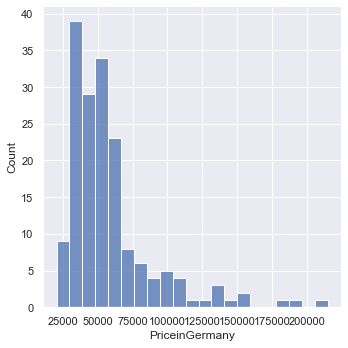

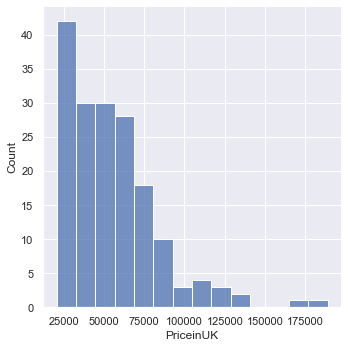

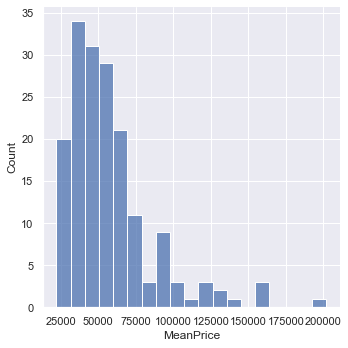

In [19]:
prices = ['PriceinGermany','PriceinUK','MeanPrice']
for price in prices :
    sns.displot(df[price])

In [20]:
for skew in prices:
    print(df[skew].skew())

2.2021085818991946
1.78121313126145
1.9937190765633293


* The price columns showed distribution with positive skewness.

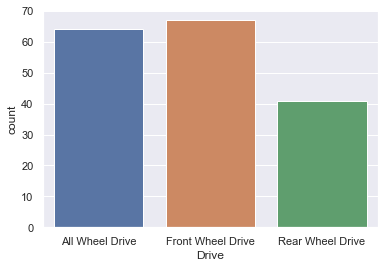

In [21]:
sns.countplot(x = 'Drive', data = df);

* We could see that the EV's wheel drive is dominated by FWD followed by AWD. There's many things causing this, but one of it are FWD is cheaper to design and make than other drives, which means the vehicle may be less expensive for consumers, and also have better mileage.

* Let's see the distribution between Efficiency and the price

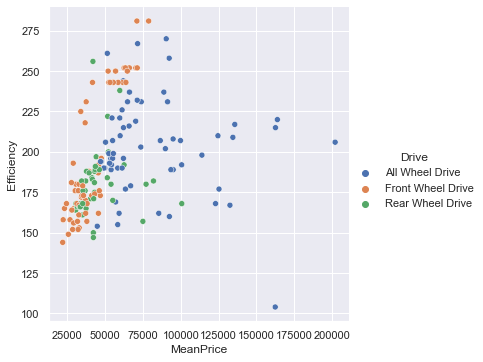

In [22]:
sns.relplot(x = 'MeanPrice', y = 'Efficiency', hue='Drive', data = df);

* We could see that majority of FWD EV's are cheaper and more efficient.

* The downside of an FWD vehicle is that the handling suffers somewhat. While traction is good, handling the vehicle around corners and curves isn’t as strong as an RWD car, especially at faster speeds.

* Lets see which manufacture produce most EV

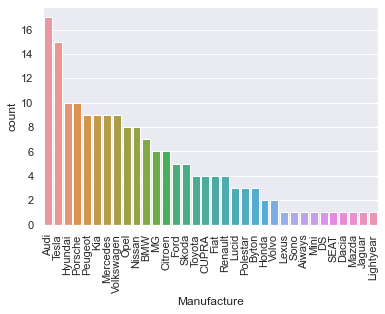

In [23]:
sns.countplot(x = 'Manufacture', data=df, order=df.Manufacture.value_counts().index)
plt.xticks(rotation = 90)
plt.show()

* Majority of EV's are produced by Audi and followed by Tesla.

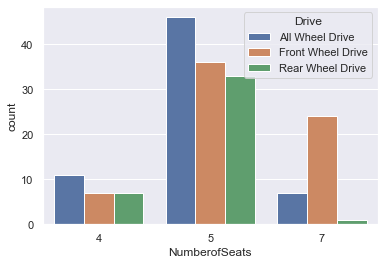

In [24]:
sns.countplot(x = 'NumberofSeats', hue='Drive', data=df);

* The market for EV's is targeted for family use for now. As we could see, the number of seats are dominated by 5 seats followed by 7. Some of the benefits of more seats are storage space, variety, towing capacity, etc.

* Let's see the correlation between variables

<AxesSubplot:>

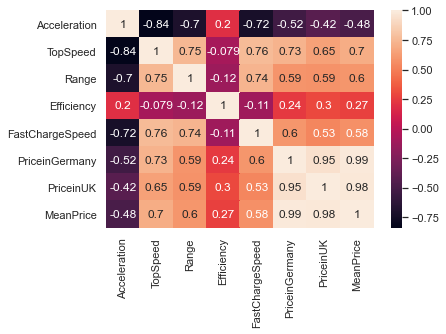

In [25]:
sns.heatmap(df.corr(), annot=True)

* Let's see the correlation between variables

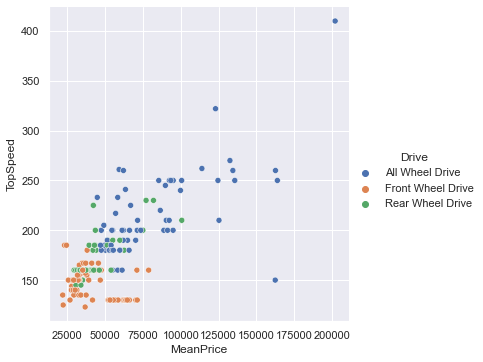

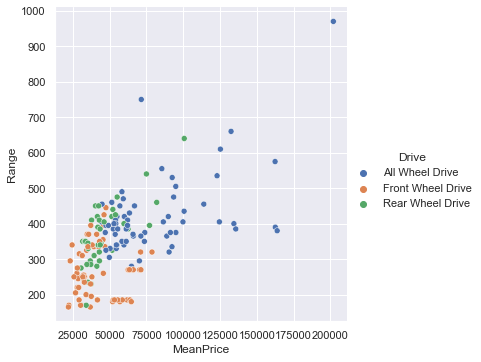

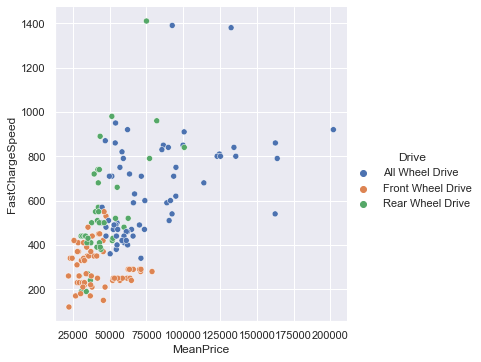

In [26]:
high_corr = ['TopSpeed','Range','FastChargeSpeed']
for cols in high_corr:
    sns.relplot(x = 'MeanPrice',y = cols, data = df, hue = 'Drive')

* Based on the analytics, there's somethings that affecting the EV's price, and we could not merely choose the best EV's just by seeing the price alone.

In [27]:
df.sort_values(by = ['MeanPrice','Efficiency'], ascending = True).head(3)

,Name,Manufacture,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,MeanPrice
97,Fiat 500e Hatchback 24 kWh,Fiat,Battery Electric Vehicle | 23.8 kWh,9.5,135.0,165.0,144.0,260.0,Front Wheel Drive,4,23560.00,20495.0,22027.500
93,Dacia Spring Electric,Dacia,Battery Electric Vehicle | 26.8 kWh,15.0,125.0,170.0,158.0,120.0,Front Wheel Drive,4,20490.00,24178.2,22334.100
87,MG MG5 EV,MG,Battery Electric Vehicle | 48.8 kWh,7.7,185.0,295.0,165.0,340.0,Front Wheel Drive,5,21330.75,25095.0,23212.875


## And the cheapest EV based on the datasets is "Fiat 500e Hatchback 24 kWh".